In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
tips = pd.read_csv('../../examples/tips.csv')

In [4]:
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [5]:
party_counts = party_counts.loc[:, 2:5]

In [6]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [7]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [8]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [9]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [10]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<AxesSubplot:xlabel='day'>

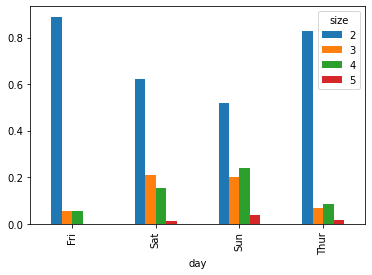

In [11]:
party_pcts.plot.bar()

In [12]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

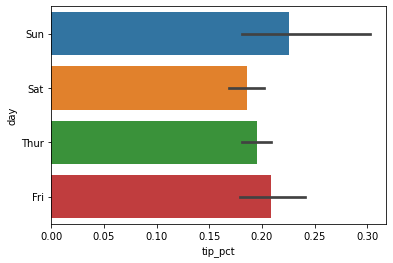

In [13]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:ylabel='Frequency'>

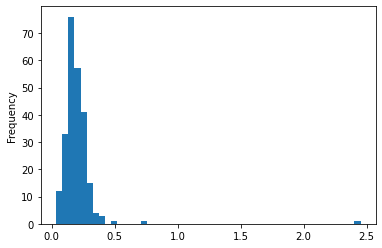

In [14]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

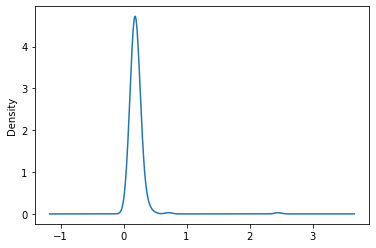

In [15]:
tips['tip_pct'].plot.density()

In [16]:
com1 = np.random.normal(0, 1, size=200)

In [17]:
com2 = np.random.normal(10,2, size=200)

In [18]:
values = pd.Series(np.concatenate([com1, com2]))

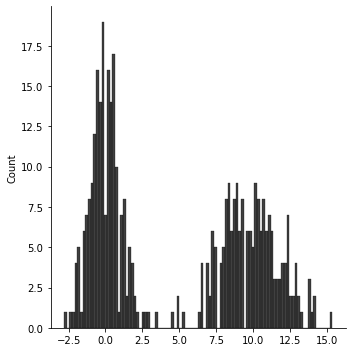

In [19]:
sns.displot(values, bins=100, color='k')

In [21]:
macro = pd.read_csv('../../examples/macrodata.csv')

In [22]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [23]:
trans_data = np.log(data).diff().dropna()

In [24]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


/Users/ningxuhui/opt/anaconda3/envs/cv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='m1', ylabel='unemp'>

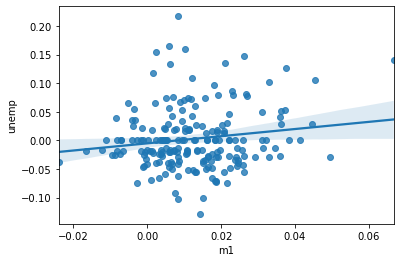

In [25]:
sns.regplot('m1', 'unemp', data=trans_data)

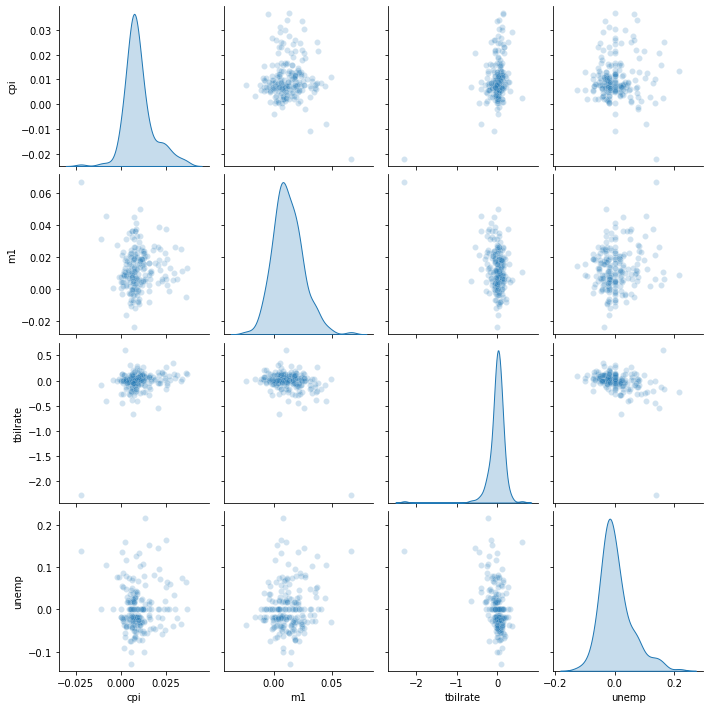

In [26]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})